In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import numpy as np
import os 
from random import shuffle
import cv2
import glob

In [0]:
!unzip -qq ml.zip

In [0]:
TEST_DIR = '/ml/test'
TRAIN_DIR = '/ml/train'
LEARNING_RATE = 1e-3
MODEL_NAME = "dogsvscats-{}-{}.model".format(LEARNING_RATE,"6conv-fire")
IMAGE_SIZE = 50

In [0]:
def label_image(img):
    img_name =img.split('/')[-1].split('.')[0]
    print('image name ',img_name)
    
    if img_name == "cat":

      return [1,0]

    elif img_name == "dog":

      return [0,1]

In [0]:
def train_data_loder():
    training_data = []
    
    for img in glob.glob('ml/train/*.*'):
            
            img_lable = label_image(img)
            print('label name ',img_lable)
            
            img = cv2.resize(cv2.imread(img,cv2.IMREAD_GRAYSCALE),(IMAGE_SIZE,IMAGE_SIZE))
            training_data.append([np.array(img),np.array(img_lable)])

    shuffle(training_data)
    
    np.save("training_data_new.npy",training_data)
    
    return training_data
#This is for Testing Data
def testing_data():
    test_data = []
    
    for img in glob.glob('ml/test/*.*'):
            img_labels =label_image(img)
            
            img = cv2.resize(cv2.imread(img,cv2.IMREAD_GRAYSCALE),(IMAGE_SIZE,IMAGE_SIZE))
            test_data.append([np.array(img),np.array(img_labels)])

    shuffle(test_data)
    np.save("test_dataone.npy",test_data)

    return test_data


image name  dog
image name  cat
image name  dog
image name  dog
image name  dog
image name  dog
image name  dog
image name  cat
image name  cat
image name  cat
image name  dog
image name  dog
image name  dog
image name  cat
image name  cat
image name  cat
image name  cat
image name  dog
image name  cat
image name  cat
image name  cat
image name  dog
image name  cat
image name  cat
image name  cat
image name  cat
image name  dog
image name  dog
image name  cat
image name  dog
image name  dog
image name  dog
image name  dog
image name  dog
image name  dog
image name  dog
image name  cat
image name  cat
image name  cat
image name  cat
2
[[253 254 252 ... 118 188 200]
 [139 138 157 ... 110 190 194]
 [144 151 163 ... 107 185 141]
 ...
 [157 165 167 ... 122 117 108]
 [154 155 164 ... 122 117 110]
 [152 155 157 ... 118 112 110]]
[0 1]
2
[[140  96 114 ...  78  91  78]
 [117  98 110 ...  73  92 136]
 [ 69  90 113 ...  67 115  69]
 ...
 [ 53  76  92 ... 202 224 180]
 [ 45  84  44 ... 217 209 165

2
[[ 24  24  25 ...  56  63  52]
 [ 23  23  23 ...  46  40  35]
 [ 22  22  22 ...  64  60  55]
 ...
 [ 32  35  36 ... 144 136 128]
 [ 29  31  33 ... 148 139 123]
 [ 20  15  17 ... 126 118 103]]
[1 0]


In [0]:
import tflearn
from tflearn.layers.conv import conv_2d,max_pool_2d
from tflearn.layers.core import input_data,dropout,fully_connected
from tflearn.layers.estimator import regression

In [0]:
import tensorflow as tf
tf.reset_default_graph()

convnet = input_data(shape=[
None, IMAGE_SIZE, IMAGE_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')

convnet = regression(convnet, optimizer='adam', learning_rate=LEARNING_RATE, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')


In [0]:
train_data_loder()

ml/train/cat.41.jpg
ml/train/dog.53.jpg
ml/train/dog.86.jpg
ml/train/cat.29.jpg
ml/train/dog.22.jpg
ml/train/dog.51.jpg
ml/train/dog.100.jpg
ml/train/dog.84.jpg
ml/train/dog.39.jpg
ml/train/dog.109.jpg
ml/train/cat.8.jpg
ml/train/cat.86.jpg
ml/train/cat.107.jpg
ml/train/dog.38.jpg
ml/train/cat.108.jpg
ml/train/cat.104.jpg
ml/train/dog.28.jpg
ml/train/cat.75.jpg
ml/train/cat.56.jpg
ml/train/cat.81.jpg
ml/train/dog.27.jpg
ml/train/cat.55.jpg
ml/train/dog.24.jpg
ml/train/dog.102.jpg
ml/train/cat.67.jpg
ml/train/dog.76.jpg
ml/train/dog.91.jpg
ml/train/dog.57.jpg
ml/train/dog.52.jpg
ml/train/cat.7.jpg
ml/train/cat.101.jpg
ml/train/dog.15.jpg
ml/train/dog.96.jpg
ml/train/cat.106.jpg
ml/train/cat.84.jpg
ml/train/dog.3.jpg
ml/train/cat.0.jpg
ml/train/dog.44.jpg
ml/train/cat.3.jpg
ml/train/dog.78.jpg
ml/train/dog.75.jpg
ml/train/dog.54.jpg
ml/train/dog.62.jpg
ml/train/cat.28.jpg
ml/train/cat.38.jpg
ml/train/dog.80.jpg
ml/train/cat.6.jpg
ml/train/dog.13.jpg
ml/train/cat.99.jpg
ml/train/dog.94.jp

[[array([[ 72, 106, 127, ...,  89,  85,  80],
         [173, 167, 149, ...,  90,  88,  75],
         [190, 199, 184, ..., 104,  83,  82],
         ...,
         [ 11,  29,  53, ..., 117, 108, 114],
         [ 40,  69,  77, ..., 103, 100, 111],
         [ 21,  26,  60, ..., 112, 114, 111]], dtype=uint8),
  array(None, dtype=object)],
 [array([[253, 252, 252, ..., 214, 190, 185],
         [254, 253, 254, ..., 198, 198, 192],
         [254, 254, 254, ...,  74, 199, 202],
         ...,
         [146, 146, 153, ...,  91,  93,  88],
         [149, 153, 148, ...,  94,  97,  91],
         [150, 158, 161, ...,  97,  93,  94]], dtype=uint8),
  array(None, dtype=object)],
 [array([[150, 150, 151, ..., 150, 147, 148],
         [149, 150, 152, ..., 160, 148, 141],
         [168, 149, 149, ..., 143, 149, 135],
         ...,
         [155, 155, 158, ...,  95,  95, 124],
         [152, 157, 162, ...,  99,  94,  98],
         [148, 156, 158, ..., 126, 140, 139]], dtype=uint8),
  array(None, dtype=objec

In [0]:
train_data=train_data_loder()

image name  cat
label name  [1, 0]
image name  dog
label name  [0, 1]
image name  dog
label name  [0, 1]
image name  cat
label name  [1, 0]
image name  dog
label name  [0, 1]
image name  dog
label name  [0, 1]
image name  dog
label name  [0, 1]
image name  dog
label name  [0, 1]
image name  dog
label name  [0, 1]
image name  dog
label name  [0, 1]
image name  cat
label name  [1, 0]
image name  cat
label name  [1, 0]
image name  cat
label name  [1, 0]
image name  dog
label name  [0, 1]
image name  cat
label name  [1, 0]
image name  cat
label name  [1, 0]
image name  dog
label name  [0, 1]
image name  cat
label name  [1, 0]
image name  cat
label name  [1, 0]
image name  cat
label name  [1, 0]
image name  dog
label name  [0, 1]
image name  cat
label name  [1, 0]
image name  dog
label name  [0, 1]
image name  dog
label name  [0, 1]
image name  cat
label name  [1, 0]
image name  dog
label name  [0, 1]
image name  dog
label name  [0, 1]
image name  dog
label name  [0, 1]
image name  dog
labe

In [0]:

train = train_data[:]


In [0]:
test=testing_data()

image name  dog
image name  cat
image name  dog
image name  dog
image name  dog
image name  dog
image name  dog
image name  cat
image name  cat
image name  cat
image name  dog
image name  dog
image name  dog
image name  cat
image name  cat
image name  cat
image name  cat
image name  dog
image name  cat
image name  cat
image name  cat
image name  dog
image name  cat
image name  cat
image name  cat
image name  cat
image name  dog
image name  dog
image name  cat
image name  dog
image name  dog
image name  dog
image name  dog
image name  dog
image name  dog
image name  dog
image name  cat
image name  cat
image name  cat
image name  cat


In [0]:
X = np.array([i[0] for i in train]).reshape(-1,IMAGE_SIZE,IMAGE_SIZE,1)
Y = [i[1] for i in train]

In [0]:
test_x = np.array([i[0] for i in test]).reshape(-1,IMAGE_SIZE,IMAGE_SIZE,1)
test_y = [i[1] for i in test]


In [0]:
model.fit(X, Y, n_epoch=6, validation_set=(test_x,  test_y), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 27  | total loss: 0.69495 | time: 0.058s
| Adam | epoch: 007 | loss: 0.69495 - acc: 0.4772 -- iter: 192/200
Training Step: 28  | total loss: 0.69290 | time: 1.075s
| Adam | epoch: 007 | loss: 0.69290 - acc: 0.4986 | val_loss: 0.69260 - val_acc: 0.5000 -- iter: 200/200
--


In [0]:
model.save(MODEL_NAME)

In [0]:
test_data = np.load("test_dataone.npy",allow_pickle=True)

[array([[126, 110, 103, ...,  21,  17,  19],
       [128, 106, 142, ...,  18,  19,  21],
       [133,  70, 140, ...,  19,  18,  20],
       ...,
       [ 78,  68,  96, ...,  72,  67,  73],
       [ 53,  32,  55, ...,  93,  77,  93],
       [ 42,  56,  83, ..., 108,  77,  82]], dtype=uint8), array(None, dtype=object)]
2
[[126 110 103 ...  21  17  19]
 [128 106 142 ...  18  19  21]
 [133  70 140 ...  19  18  20]
 ...
 [ 78  68  96 ...  72  67  73]
 [ 53  32  55 ...  93  77  93]
 [ 42  56  83 ... 108  77  82]]
None


image name [[178 178 178 ... 119 156 138]
 [178 178 178 ... 107 165 147]
 [178 178 179 ...  63 107 115]
 ...
 [124 143 130 ... 114 111 111]
 [136 150 146 ... 111 111 112]
 [145 168 137 ... 111 111 111]]
model prediction  [0.4855919 0.5144081]


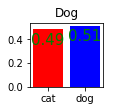

image name [[213 216 215 ... 215 210 212]
 [213 216 214 ... 220 212 209]
 [212 215 216 ... 215 213 211]
 ...
 [204 185 217 ... 223 219 221]
 [204 216 207 ... 238 200 211]
 [181 235 203 ... 245 226 215]]
model prediction  [0.48441586 0.5155842 ]


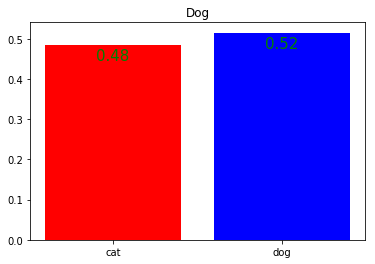

image name [[129 103 112 ...  38  97  68]
 [173 187  75 ...  58 115  60]
 [151 166 112 ... 118  80 101]
 ...
 [188 190  89 ... 132  99  75]
 [155 176  94 ...  73  73  95]
 [120  96 181 ...  66 125  77]]
model prediction  [0.48215416 0.5178458 ]


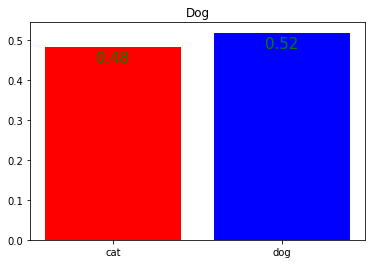

image name [[134 114 171 ... 212 212 212]
 [147 170 154 ... 212 212 212]
 [167 140 151 ... 209 209 209]
 ...
 [ 37  39  38 ... 152 151 148]
 [ 35  32  28 ... 154 149 144]
 [ 24  26  28 ... 157 149 144]]
model prediction  [0.4861552 0.5138447]


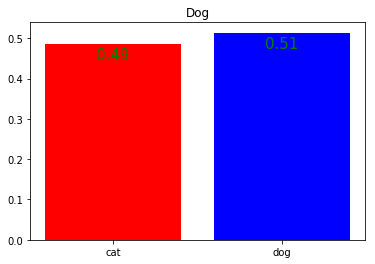

image name [[ 62  51  90 ...  80 102 138]
 [ 29  19 123 ...  88  84  82]
 [ 19  29 128 ...  18  13  56]
 ...
 [105  55 103 ... 126 149  92]
 [104 113 124 ... 134 123 130]
 [107 122  99 ... 139 130 132]]
model prediction  [0.4855689 0.5144311]


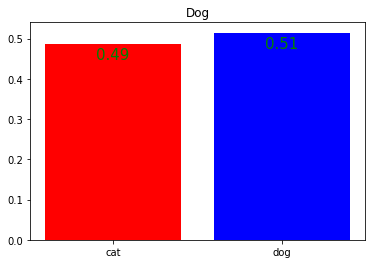

image name [[219 222 222 ... 218 243 246]
 [232 231 231 ... 240 245 246]
 [219 218 229 ... 240 245 246]
 ...
 [114 124 126 ... 235 223 239]
 [124 139 137 ... 235 221 238]
 [116 137 128 ... 235 226 238]]
model prediction  [0.48532185 0.5146781 ]


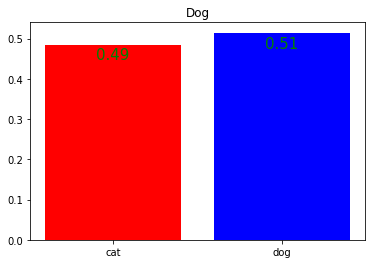

image name [[217 229 229 ...  81  78  62]
 [217 226 235 ...  77  67  87]
 [193 204 237 ...  77 170 184]
 ...
 [244 242 241 ... 229 226 225]
 [235 231 226 ... 228 215 212]
 [229 224 224 ... 214 204 193]]
model prediction  [0.48500854 0.51499146]


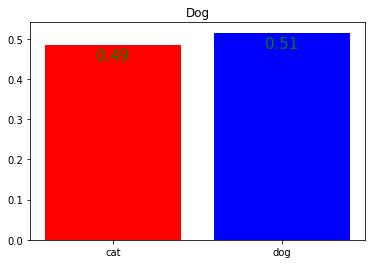

image name [[ 79  81  86 ... 156 154 126]
 [ 81  83  88 ... 159 156 124]
 [ 80  84  90 ... 157 156 122]
 ...
 [ 65 159  69 ...  79  69  48]
 [ 61 157  67 ...  80  76  73]
 [ 60 149  66 ...  79  75  74]]
model prediction  [0.48401418 0.5159858 ]


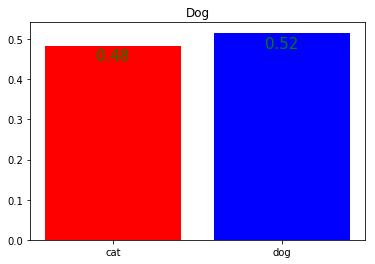

image name [[ 42  42  43 ...  99  99  99]
 [ 44  44  45 ...  99  99  99]
 [ 46  47  46 ...  99  97  99]
 ...
 [ 82  21  38 ... 118 121 123]
 [ 35  47  25 ...  72  79  82]
 [168 167 177 ...  76  81  81]]
model prediction  [0.48638144 0.5136186 ]


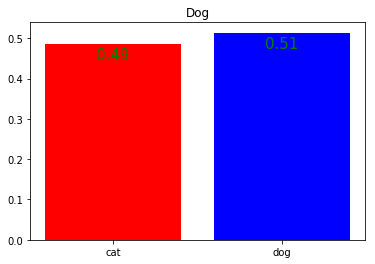

image name [[135 135 134 ... 110 106 105]
 [134 137 135 ... 100 100 103]
 [136 136 138 ... 104 100  98]
 ...
 [ 68  76  66 ...  77  83  79]
 [ 67  80  61 ...  88  82  76]
 [ 69  69  75 ...  69  73  75]]
model prediction  [0.48728108 0.51271886]


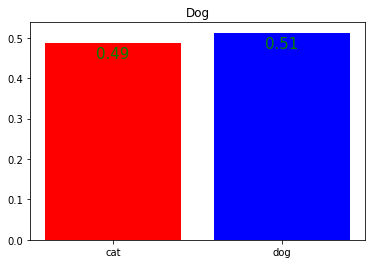

image name [[251 252 252 ... 214 211 211]
 [253 253 254 ... 216 211 213]
 [248 254 253 ... 213 209 205]
 ...
 [188 217 202 ... 216 129 217]
 [194 167 188 ... 192 194 183]
 [193 166 175 ... 216 190 186]]
model prediction  [0.48301962 0.5169804 ]


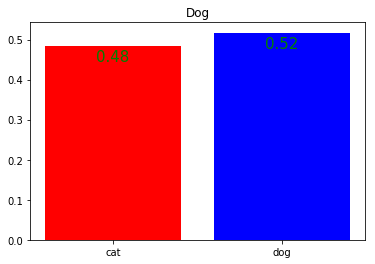

image name [[140  96 114 ...  78  91  78]
 [117  98 110 ...  73  92 136]
 [ 69  90 113 ...  67 115  69]
 ...
 [ 53  76  92 ... 202 224 180]
 [ 45  84  44 ... 217 209 165]
 [ 59  75  22 ... 205 201 188]]
model prediction  [0.48353633 0.5164637 ]


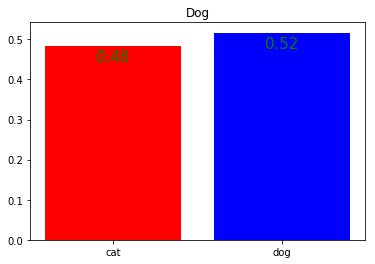

In [0]:
import matplotlib.pyplot as plt

figs = plt.figure()
for num,data in enumerate(test_data[:12]):
    test_img = data[0]
    print('image name',test_img)
    test_lable = data[1]
    test_img_feed = test_img.reshape(IMAGE_SIZE,IMAGE_SIZE,1)
    t = figs.add_subplot(3,4,num+1)
    ores = test_img
    
    model_pred = model.predict([test_img_feed])[0]
    print('model prediction ',model_pred)
    xs=np.array(['cat','dog'])
    ys=np.array(model_pred)
    plt.bar(xs,ys,color=['r','b'])
    for x,y in zip(xs,ys):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,-15), # distance from text to points (x,y)
                     ha='center',color='green',size=15) # horizontal alignment can be left, right or center
    
    
    if np.argmax(model_pred) == 1:
        pred_val = "Dog"
        plt.title('Dog')
    else:
        pred_val = "Cat"
        plt.title('Cat')
    plt.show()    
        
    


In [0]:
with open("final_results(dogs).csv",mode="w") as f:
    f.write("id,pred \n")
    
with open("final_results.csv(dogs)",mode="a") as r:
    for data in tqdm(test_data):
        img_class = data[1]
        img = data[0]
        imgs = img.reshape((IMAGE_SIZE,IMAGE_SIZE,1))
        model_out = model.predict([imgs])[0]
        r.write("{},{} \n".format(img_class,model_out[1]))

100%|██████████| 40/40 [00:00<00:00, 312.90it/s]
